# Credit Card Default Risk  
  




Problem Statement - To build a Machine Learning (ML) model that can predict if there will be credit card default.  

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, make_scorer


# Suppress all Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing training dataset
train_data = pd.read_csv("dataset/train.csv")
# Importing test dataset
test_data = pd.read_csv("dataset/test.csv")
# Copying the customer_id column of test data for final submission
test_df = test_data['customer_id'].copy()
# Printing the first 5 rows of the train data to get an overview
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [3]:
# Train data stats
train_data.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [4]:
# Checking the columns containing null values
train_data.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [5]:
# Checking the column types of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
# Displaying the dimensions of the train data
train_data.shape

(45528, 19)

In [7]:
print("Unique values in Train Data:")
print()
for i in train_data.columns:
    print(i, train_data[i].unique())
    
print("\nUnique values in Test Data:")
print()
for i in test_data.columns:
    print(i, test_data[i].unique())

Unique values in Train Data:

customer_id ['CST_115179' 'CST_121920' 'CST_109330' ... 'CST_145435' 'CST_130913'
 'CST_160078']
name ['ita Bose' 'Alper Jonathan' 'Umesh Desai' ... 'Roantree Kevin'
 'Radu Marinas' 'Mostafavi']
age [46 29 37 39 38 40 32 52 43 24 41 34 50 36 42 23 27 26 30 35 48 53 47 28
 33 49 51 55 54 25 31 44 45]
gender ['F' 'M' 'XNA']
owns_car ['N' 'Y' nan]
owns_house ['Y' 'N']
no_of_children [ 0.  1.  2. nan  3.  4.  5.  6.  7.  8.  9.]
net_yearly_income [107934.04 109862.62 230153.17 ... 260052.18 157363.04 316896.28]
no_of_days_employed [  612.  2771.   204. ... 10398. 10009.  5372.]
occupation_type ['Unknown' 'Laborers' 'Core staff' 'Accountants' 'High skill tech staff'
 'Sales staff' 'Managers' 'Drivers' 'Medicine staff' 'Cleaning staff'
 'HR staff' 'Security staff' 'Cooking staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Private service staff' 'Secretaries'
 'Realty agents' 'IT staff']
total_family_members [ 1.  2.  3.  4.  5.  6. nan  7.  8.  9. 10.]
migran

Its observed that the "gender" column has a "XNA" value which needs to be replaced. The unique values give an overall idea about the values of all columns.

In [8]:
print("No. of duplicate values in train data:", train_data.shape[0]-len(train_data['customer_id'].unique()))
print("No. of duplicate values in test data:", test_data.shape[0]-len(test_data['customer_id'].unique()))

No. of duplicate values in train data: 0
No. of duplicate values in test data: 0


There are no duplicate Customer IDs in the train and test data.

In [9]:
# Dropping the "customer_id" and "name" columns as they aren't needed for model training
train_data = train_data.drop(['customer_id', 'name'], axis = 1)

## Distribution Plots of Columns containing Missing Values

<AxesSubplot:xlabel='no_of_children', ylabel='Density'>

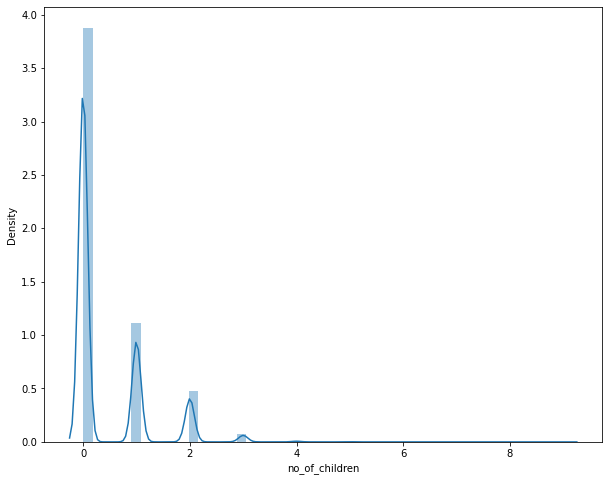

In [10]:
plt.subplots(figsize = (10,8))
sns.distplot(train_data.no_of_children)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Density'>

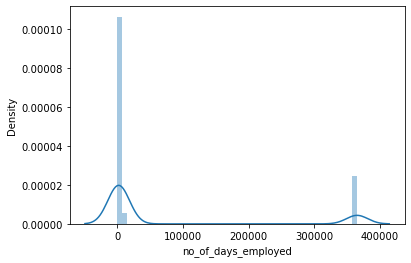

In [11]:
sns.distplot(train_data.no_of_days_employed)

<AxesSubplot:xlabel='total_family_members', ylabel='Density'>

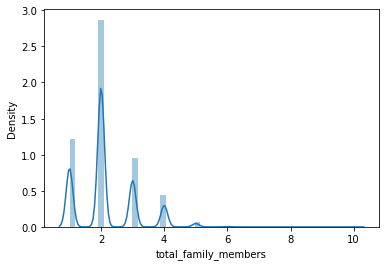

In [12]:
sns.distplot(train_data.total_family_members)

<AxesSubplot:xlabel='migrant_worker', ylabel='Density'>

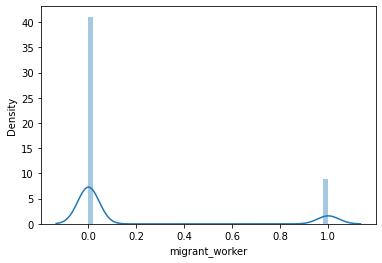

In [13]:
sns.distplot(train_data.migrant_worker)

<AxesSubplot:xlabel='yearly_debt_payments', ylabel='Density'>

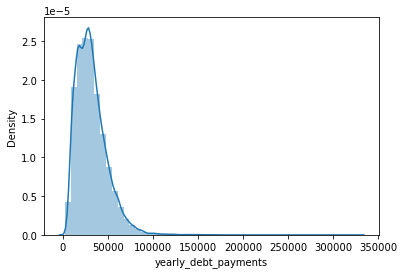

In [14]:
sns.distplot(train_data.yearly_debt_payments)

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

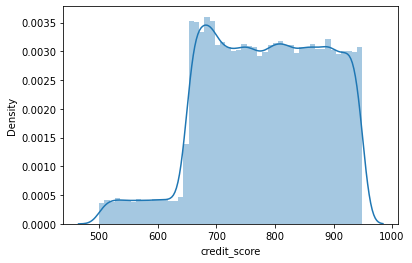

In [15]:
sns.distplot(train_data.credit_score)

Columns "yearly_debt_payments" and "credit_score" have skewed distributions. Hence, Mean Imputation is not recommended for these columns to fill their missing values. The rest of the columns, containing missing values, have normal distributions. Median Imputation is used in this problem to fill the missing values of the dataset.
(For Normal Distributions, Mean = Median. Median can still be used in this case.)

In [16]:
# Storing in a list - the names of the columns containing missing values
median_impute_cols = ['no_of_children', 'no_of_days_employed', 'yearly_debt_payments', 'credit_score', 
                      'total_family_members', 'migrant_worker']

In [17]:
# Function used to fill the missing values in the dataset and encode the "object" type columns using Label Encoding
def missing_values(data):
    # Replacing the "XNA" value of the "gender" column with the mode of the column
    data['gender'] = data['gender'].replace('XNA', data['gender'].mode()[0])
    
    # Mode Imputation is recommended for filling missing values in a categorical column value type
    for col in data:
        if data[col].dtypes == 'object':
            data[col] = data[col].fillna(data[col].mode()[0])

    le = LabelEncoder()
    
    # Label Encoding for "object" type columns
    for col in data:
        if data[col].dtypes == 'object':
            data[col] = le.fit_transform(data[col])
            
    # Median Imputation to fill the rest of the missing values ("int" and "float" types)
    for col in median_impute_cols:
        data[col] = data[col].fillna(data[col].median())
        
    # Displaying the count of null values in the dataset after filling missing values and encoding
    print(data.isna().sum())
    print('\n')
    # Displaying the column types
    print(data.info())

In [18]:
# Filling the missing values in the train data and label encoding the categorical values
missing_values(train_data)

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   gender                   45528 non-null  int32  
 2   owns_car                 45528 non-null  int32  
 3   owns_house               45528 non-null  int32  
 4   no_of_children           45528 non-null  float64
 5   

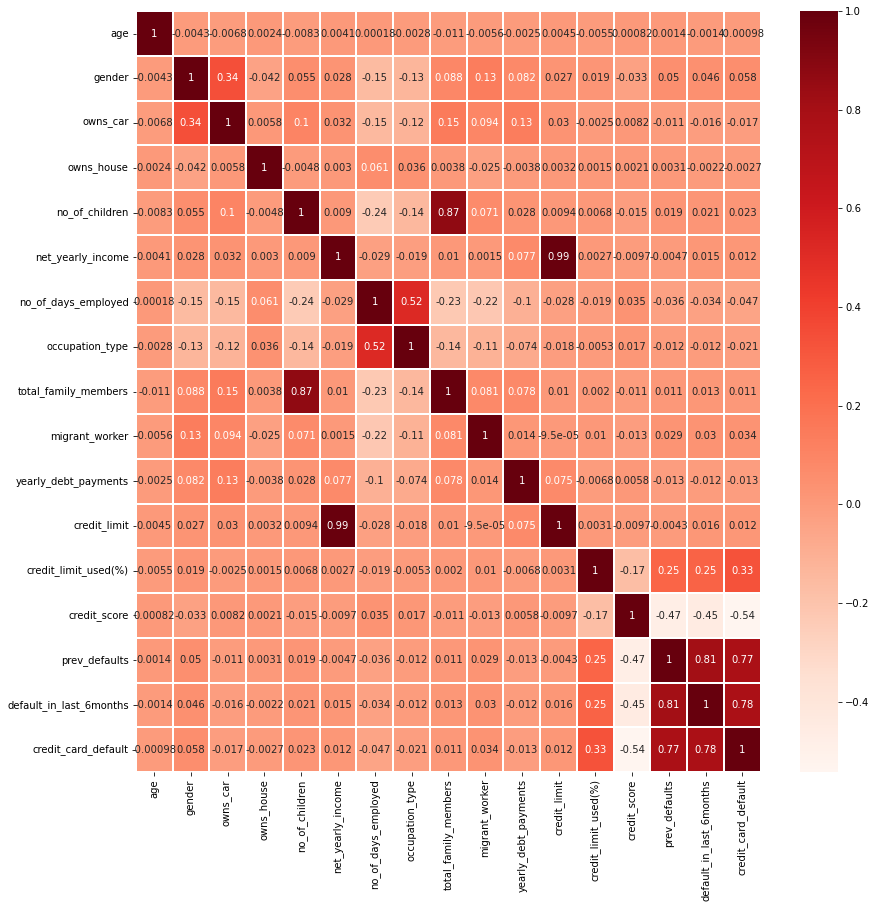

In [19]:
# Heatmap to compare the correlation coefficients of the columns among each other
plt.figure(figsize = (14,14))
corr = train_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds", annot = True)
plt.show()

The following columns are highly correlated to each other:  
  
1) "no_of_children" and "total_family_members" (0.87)  
2) "net_yearly_income_ and "credit_limit" (0.99)  
3) "prev_defaults" and "default_in_last_6months" (0.81)  

In [20]:
# Displaying the dimensions of the test data
test_data.shape

(11383, 18)

In [21]:
# Checking the columns containing null values
test_data.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [22]:
# Checking the column types of the dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [23]:
# Removing the "customer_id" and "name" columns as they aren't needed for model prediction
test_data = test_data.drop(['customer_id', 'name'], axis = 1)

In [24]:
# Filling the missing values in the test data and label encoding the categorical values
missing_values(test_data)

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      11383 non-null  int64  
 1   gender                   11383 non-null  int32  
 2   owns_car                 11383 non-null  int32  
 3   owns_house               11383 non-null  int32  
 4   no_of_children           11383 non-null  float64
 5   net_yearly_income        1138

In [25]:
# Assigning X as the independent variables and Y as the dependent variable (target variable) in train data
X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1]

In [26]:
# MinMax Normalization where feature range is [0,1]
minmax = MinMaxScaler()
# Performing MinMax Normalization on X and storing the normalized values
X = pd.DataFrame(minmax.fit_transform(X), columns = X.columns)
# Displaying the first 5 rows of the normalized train data
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,0.71875,0.0,0.0,1.0,0.0,0.000574,0.001670,0.944444,0.000000,1.0,0.094615,0.000472,0.737374,0.097996,1.0,1.0
1,0.18750,1.0,0.0,1.0,0.0,0.000588,0.007581,0.444444,0.111111,0.0,0.040175,0.001084,0.525253,0.795100,0.0,0.0
2,0.43750,1.0,0.0,1.0,0.0,0.001442,0.000553,0.444444,0.111111,0.0,0.141708,0.001208,0.434343,0.334076,0.0,0.0
3,0.50000,0.0,0.0,1.0,0.0,0.000676,0.032687,0.166667,0.111111,0.0,0.062407,0.000920,0.202020,0.565702,0.0,0.0
4,0.71875,1.0,1.0,1.0,0.0,0.002559,0.003989,0.166667,0.000000,0.0,0.110611,0.001573,0.757576,0.951002,0.0,0.0


In [27]:
# Splitting the normalized train data where training data size is 80% and validation data size is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Comparing the counts of the unique values in the target column "credit_card_default"
train_data['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

The count of 1s is considerably lower than those of 0s resulting the class to be imbalanced.

## ML Algorithms Used  
  
1) Logistic Regression  
2) Random Forest  
3) Gradient Boosting Classifier  

In [29]:
# Model training
logreg = LogisticRegression().fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

# Model Prediction on the validation data
lr_pred = logreg.predict(X_test)
rfc_pred = rfc.predict(X_test)
gb_pred = gb.predict(X_test)

# Calculating the Macro-F1 Score for each model
score_log = 100*(f1_score(y_test, lr_pred, average = "macro")) 
score_rfc = 100*(f1_score(y_test, rfc_pred, average = "macro"))
score_gb = 100*(f1_score(y_test, gb_pred, average = "macro"))

# Displaying the Macro-F1 scores of each model
print("Macro-F1 Score for Logestic Regression: " + str(score_log) + "%")
print("Macro-F1 Score for Random Forest: " + str(score_rfc) + "%")
print("Macro-F1 Score for Gradient Boosting Classifier: " + str(score_gb) + "%")

print("\n")

# Classification Report generated on each model to check their Precision and Recall Values
print("Classification Report for Logistic Regression:")
print()
print(classification_report(y_test, lr_pred))

Macro-F1 Score for Logestic Regression: 92.96228691239897%
Macro-F1 Score for Random Forest: 92.78506416320656%
Macro-F1 Score for Gradient Boosting Classifier: 92.89627859444197%


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.98      0.78      0.87       771

    accuracy                           0.98      9106
   macro avg       0.98      0.89      0.93      9106
weighted avg       0.98      0.98      0.98      9106



In [30]:
print("Classification Report for Random Forest:")
print()
print(classification_report(y_test, rfc_pred))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.97      0.78      0.87       771

    accuracy                           0.98      9106
   macro avg       0.97      0.89      0.93      9106
weighted avg       0.98      0.98      0.98      9106



In [31]:
print("Classification Report for Gradient Boosting Classifier:")
print()
print(classification_report(y_test, gb_pred))

Classification Report for Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.99      0.77      0.87       771

    accuracy                           0.98      9106
   macro avg       0.99      0.89      0.93      9106
weighted avg       0.98      0.98      0.98      9106



From the above classification reports of each model, it is observed that the precision and recall values of the models on "0" values of the target variable is quite high.  
However, the actual performance of the models is tested against the "1" values of the target column/variable. In this case, the Precision values are adequately high but the Recall values are considerably low which is not favourable for a class imbalanced problem as we want the count of false negatives for the value "1" to be as low as possible.  

In [32]:
# Normalizing the test data using MinMax Normalization
test = pd.DataFrame(minmax.fit_transform(test_data), columns = test_data.columns)
# Displaying the first 5 rows of the normalized test data
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,0.90625,0.0,1.0,0.0,0.000000,0.082850,0.002741,0.944444,0.083333,0.0,0.043331,0.054843,0.040404,0.621381,0.0,0.0
1,0.78125,0.0,0.0,0.0,0.090909,0.104043,0.003671,0.944444,0.166667,0.0,0.198415,0.156478,0.707071,0.681514,0.0,0.0
2,0.84375,0.0,0.0,0.0,0.090909,0.048773,0.003321,0.944444,0.166667,0.0,0.069270,0.051645,0.717172,0.062361,1.0,0.0
3,0.21875,0.0,0.0,0.0,0.090909,0.053284,0.001385,0.444444,0.083333,1.0,0.095840,0.061196,0.090909,0.701559,0.0,0.0
4,0.90625,1.0,0.0,1.0,0.000000,0.083194,0.000438,0.444444,0.083333,1.0,0.186654,0.188382,0.828283,0.251670,0.5,1.0


In [33]:
# Random Forest Model Prediction on the test data
test_pred = rfc.predict(test)
test_pred # Displaying the model prediction values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
# Creating a Dataframe for the model prediction values
predicted_dataframe = pd.DataFrame(test_pred, columns = ['credit_card_default'])
# Merging the Model Prediction values with the "test_df" dataframe containing the "customer_id" column (created in cell 2)
test_df = pd.concat([test_df, predicted_dataframe], axis = 1)
# Displaying the resultant dataframe to check if its as per the sample submission format
test_df

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1
...,...,...
11378,CST_142412,0
11379,CST_107967,0
11380,CST_134002,0
11381,CST_146856,0


In [35]:
# Saving the Resultant Dataframe to a .csv file for final submission and evaluation
test_df.to_csv('K_Aditya_Submission.csv')

# Conclusion

The ML Models were successfully trained on the train data, tested against the validation data and used to predict the test data. The models had a Macro-F1 Score of atleast 89.6% on the test data where Random Forest gave the highest Macro-F1 score of 92.20250%.  
However, model tuning is required for the Random Forest model as it gave a Macro-F1 score in the range between 89.6% and 92.2% on the test data when the model was re-trained and used for prediction again.  
Future work will involve the hyperparameter tuning of the Random Forest model using techniques like GridSearchCV and also feature selection as a few columns were found to be highly correlated to each other. Ensemble Methods can also be carried out to improve the Recall value of the resultant model. The Recall value of the model for the value "1" of the target column is the key to having a high Macro-F1 score on the test data.